# **LGM- 08**

# **ADVANCED LEVEL TASK**

# **2) Next Word Prediction**



## **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist


## **LOADING THE DATASET**

In [ ]:
(x_train, y_train) , (x_test, y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

## **PLOTTING**

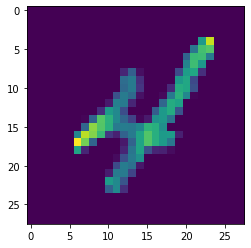

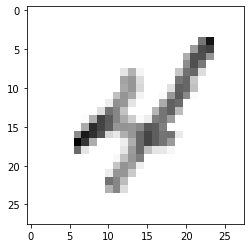

In [ ]:
plt.imshow(x_train[9])
plt.show()
plt.imshow(x_train[9] , cmap=plt.cm.binary)

In [ ]:
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

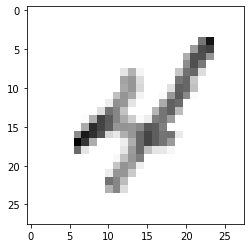

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[9] , cmap=plt.cm.binary)

In [ ]:
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[9])

4


In [ ]:
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr= np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## **DEEP LEARINING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
len(x_trainr)

60000

In [ ]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=['accuracy'])

In [ ]:
model.fit(x_trainr , y_train , epochs=5 , validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.2245 - accuracy: 0.9297 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0627 - val_accuracy: 0.9814
Epoch 3/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0614 - val_accuracy: 0.9821
Epoch 4/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 5/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0605 - val_accuracy: 0.9827


In [ ]:
loss , accuracy = model.evaluate(x_testr , y_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.3016 - accuracy: 0.1252


In [ ]:
print(loss)
print(accuracy)

2.301621437072754
0.12520000338554382


In [ ]:
predict = model.predict([x_testr])

313/313 [==============================] - 4s 13ms/step


In [ ]:
np.argmax(predict[9])

9

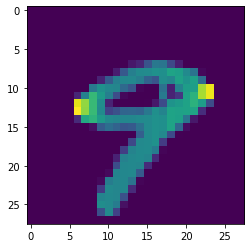

In [ ]:
plt.imshow(x_test[9])

## **CONCLUSION:**

I can conclude that this Dataset performs well in all the above tested Algorithms.